# High-z color versus redshift

This is a notebook to compare certain values of flux (ratios of flux are also known as colors) and redshift.  By the end of the notebook, you should be able to make a simple version of Fig. 7 from Reuter+2020 and will hopefully understand:
1. How to make a scatter plot with error bars
2. How to fit a linear function to data

Once we learn how to fit a line, we'll get a little fancier and use the emcee package fit a line (mostly following the emcee tutorial here: https://emcee.readthedocs.io/en/stable/tutorials/line/).  This is absolutely overkill for our purposes, but it will give us a nice way to visualize the uncertainty on our fit, which we are interested in.  

In [1]:
# in order to use a python library, you have to import it
# this tells the notebook these are the packages you want to use
# 
# these are some basic packages that are generally useful
import numpy as np # some basic math functions 
import pandas as pd # we're going to use this for reading in files
import matplotlib.pyplot as plt # for plotting
%matplotlib inline

Matplotlib created a temporary config/cache directory at /var/folders/45/sgc7fqmn1332vm6vq519l7b00000gt/T/matplotlib-brdzeusq because the default path (/Users/cassiereuter/.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [15]:
# load in our two data sets, SPT and Herschel, using pandas.  
# let's start with SPT
# csv stands for comma separated values.  commas are typically the 
# delimiter, which is a fancy to way to say how the values are separated

# spt smg photometry has historically been in a file called Flux MasterList
# so the name is for historical reasons, honest
fml = pd.read_csv('./dndz_tab_d1.txt', delim_whitespace=True,index_col=0, skiprows=[0,2]) 

# skiprows tells the read_csv function to skip both the 0th and 2nd line from the file (which are just comments 
# and units) but it's still reading the 1st row as the header, and our columns will have names

# delim_whitespace tells the read_csv function how we've separated our values.  in this case, they're separated 
# by white space (I used more than one tab at times to make it human-readable, so delim_whitespace is super useful)

# index col tells the read_csv function what our source names are, which is occasionally useful

In [16]:
# let's take a minute and look at the structure of this thing we read in
# we will use the head method to look at the first 5 columns, and check if they match the text file
fml.head(5)

,specz,S_3mm,err_3mm,S_2mm,err_2mm,S_1mm,err_1mm,S_870,err_870,S_500,err_500,S_350,err_350,S_250,err_250,S_160,err_160,S_100,err_100
#Source,,,,,,,,,,,,,,,,,,,
SPT0002-52,2.351,0.47,0.03,3.1,0.9,10.7,5.8,50.3,3.8,202.0,10.0,283.5,8.9,332.9,10.1,234.3,21.3,93.9,5.4
SPT0020-51,4.123,1.25,0.05,6.6,1.4,19.9,4.6,70.5,4.3,144.1,8.6,120.9,7.4,71.5,7.5,NaN,8.7,NaN,2.7
SPT0027-50,3.444,1.41,0.05,8.6,1.4,35.6,5.1,138.4,8.2,316.1,8.1,325.7,7.2,232.9,6.8,85.6,13.0,15.8,2.3
SPT0054-41,4.877,1.80,0.06,10.4,1.5,32.5,5.3,98.4,6.5,174.2,10.3,125.9,8.9,79.0,9.3,NaN,NaN,NaN,NaN
SPT0103-45,3.090,1.46,0.23,8.2,1.5,30.6,5.2,124.5,6.1,231.6,7.6,213.3,6.8,133.2,10.8,NaN,15.7,NaN,4.4


Cool, this looks like our file.  Now let's practice a bit with pandas.  

Write a command that will get all $S_{870 um}$ values (your answer should be an array)

In [17]:
fml['S_870'].values

array([ 50.3,  70.5, 138.4,  98.4, 124.5, 145.3, 109.2,  36.1,  79.4,
       143.5, 109. ,  68.7,  83.3,  62.7, 174.2, 109.4,  66.3,  84.5,
        61.2,  56.8,  36.9, 104.1,  67.1,  89.2, 130.8,  51.5, 199.9,
        39.5, 108.4,  60.3,  74.6,  79.8,  42.8,  25.5,  52.6,  61.4,
        75. ,  33.2,  56. ,  27.4, 118.3, 117.5, 125.2,  86.9,  53. ,
       138.7,  74. ,  48.3,  43.3,  55.8, 150.3,  65.2, 125.2, 172.1,
        64.5, 131.3,  54.1,  61.9,  77.5,  87.4,  57.9, 101.2,  54.5,
        61.3,  96.5,  63.2,  60.2,  59.7,  44.1,  30.5,  38.1, 168. ,
        35.6,  34.2,  42.6,  37.3,  56.5,  34.6,  40.6,  66. ,  53.4])

Now write a command that will get all the photometry for SPT0054-41

In [19]:
fml.loc['SPT0054-41']

specz        4.877
S_3mm        1.800
err_3mm      0.060
S_2mm       10.400
err_2mm      1.500
S_1mm       32.500
err_1mm      5.300
S_870       98.400
err_870      6.500
S_500      174.200
err_500     10.300
S_350      125.900
err_350      8.900
S_250       79.000
err_250      9.300
S_160          NaN
err_160        NaN
S_100          NaN
err_100        NaN
Name: SPT0054-41, dtype: float64

Now, what is the flux at 500 um for SPT0054-41?  

Write some python that will answer the question for you.  

In [20]:
fml.loc['SPT0054-41', 'S_500']

174.2

Now let's make a quick plot of 350 um flux versus redshift (which is in the specz column here).  Use matplotlib's errorbar function to draw error bars on your points and change your y-axis to logscale.

Don't forget to label your axes!

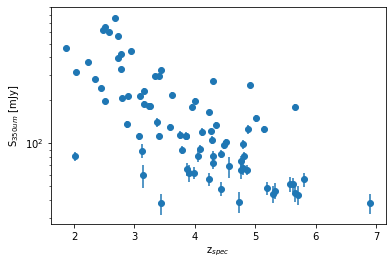

In [49]:
fig = plt.figure()
plt.errorbar(fml['specz'].values, fml['S_350'].values, yerr=fml['err_350'], ls='none', marker='o')
plt.yscale('log')
plt.xlabel(r'z$_{spec}$')
plt.ylabel(r'S$_{350 um}$ [mJy]')
plt.show()

In [47]:
# Let's do the same thing for Herschel.  

# we can open this file up in your favorite text editor and see that first line is the header,
# and the delimiter is a comma

# write a pandas command that will read the herschel file
# usually the # means a comment, and is commonly used to comment out (i.e. ignore) data we don't want to use.  
# make sure to not include this data!
spire = pd.read_csv('./photometry_published_lensed_spire.txt', sep=',', index_col=0, comment='#', header=0)

In [48]:
# take a minute to confirm you did this correctly
spire.head(5)

,z,s100,e100,s160,e160,s250,e250,s350,e350,s500,e500,s880,e880,s1200,e1200,ref
ID,,,,,,,,,,,,,,,,
SDP9,1.5770,208.0,34.0,416.0,94.0,471.0,7.0,343.0,8.0,181.0,9.0,24.8,3.3,6.9,1.2,Negrello2010
SDP11,1.7860,NaN,NaN,397.0,90.0,417.0,6.0,378.0,7.0,232.0,8.0,29.2,2.7,12.2,1.2,Negrello2010
SDP17,2.3051,NaN,NaN,182.0,56.0,347.0,7.0,339.0,8.0,219.0,9.0,56.6,4.1,15.3,1.3,Omont2011
SDP81,3.0420,NaN,NaN,NaN,NaN,138.0,7.0,199.0,8.0,174.0,9.0,76.4,3.8,19.6,0.9,Negrello2010
SDP130,2.6256,NaN,NaN,NaN,NaN,116.0,6.0,140.0,7.0,108.0,8.0,39.3,2.3,11.2,1.2,Negrello2010


What are the names of the each of the Herschel sources?

Write some python code that will give the answer.  

In [45]:
spire.index

Index(['SDP9', 'SDP11', 'SDP17', 'SDP81', 'SDP130', 'SDP141', 'HLock01',
       'Eyelash', 'Bullet', 'HLS', 'Planck', 'HBootes01', 'HBootes02',
       'HBootes03', 'HLock03', 'HXMM01', 'HXMM02', 'HXMM05', 'FLS3',
       'G09v1.97', 'G09v1.124', 'G09v1.40', 'G09v1.326', 'G12v2.43',
       'G12v2.30', 'NCv1.268', 'NCv1.143', 'NBv1.43', 'NAv1.195', 'NAv1.177',
       'NBv1.78', 'NAv1.144', 'NAv1.56', 'G15v2.235'],
      dtype='object', name='ID')

Great, let's add the Herschel data to our previous plot, and make sure to label which data is which

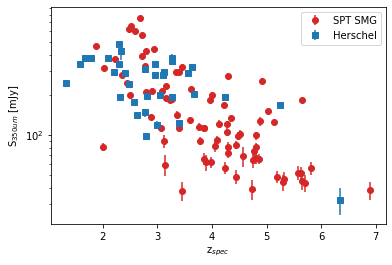

In [53]:
fig = plt.figure()
plt.errorbar(fml['specz'].values, fml['S_350'].values, yerr=fml['err_350'].values, ls='none', marker='o', color='tab:red', label='SPT SMG')
plt.errorbar(spire['z'].values, spire['s350'].values, yerr=spire['e350'].values,  ls='none', marker='s', color='tab:blue', label='Herschel')
plt.legend()
plt.yscale('log')
plt.xlabel(r'z$_{spec}$')
plt.ylabel(r'S$_{350 um}$ [mJy]')
plt.show()

However, we are not actually interested in the 350 um flux, we actually want the color S$_{350um}$ / S$_{870um}$.  

Plot S$_{350um}$ / S$_{870um}$ versus z, and make sure to propagate your errors correctly!

Hint: recall that if you have multiplication or division, your error will be related to the relative error.  That is, if you have $z=x/y$ and the error on $x$ is $\Delta x$, the error on $y$ is $\Delta y$ and the error on $z$ is $\Delta z$, these terms are related through the following: 

$$
    \frac{\Delta z}{z} = \sqrt{ \left( \frac{\Delta x}{x} \right)^2 + \left( \frac{\Delta y}{y} \right) ^2 }
$$

Another hint: 880 um is close enough to 870 um...

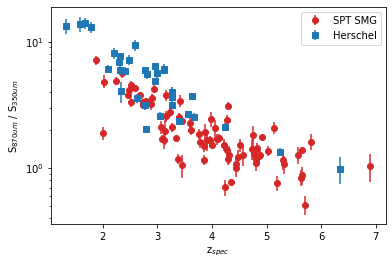

In [65]:
fig = plt.figure()

spt_err = np.sqrt((fml['err_870'].values/fml['S_870'].values)**2. + (fml['err_350'].values/fml['S_350'].values)**2.)
spt_err *= fml['S_350'].values/fml['S_870'].values
plt.errorbar(fml['specz'].values, fml['S_350'].values/fml['S_870'].values, yerr=spt_err, ls='none', marker='o', color='tab:red', label='SPT SMG')

herschel_err = np.sqrt((spire['e880'].values/spire['s880'].values)**2. + (spire['e350'].values/spire['s350'].values)**2.)
herschel_err *= spire['s350'].values/spire['s880'].values
plt.errorbar(spire['z'].values, spire['s350'].values/spire['s880'].values, yerr=herschel_err,  ls='none', marker='s', color='tab:blue', label='Herschel')

plt.legend()
plt.yscale('log')
plt.xlabel(r'z$_{spec}$')
plt.ylabel(r'S$_{870 um}$ / S$_{350 um}$ ')
plt.show()

Congratulations, you have plotted all of the data in Fig. 7 of Reuter+20!  

You'll notice that the color S$_{350um}$ / S$_{870um}$ looks very correlated with redshift.  Spectroscopic redshifts are really difficult to find, and require a lot of observing time.  Photometry (and thus, the color) is relatively easy to obtain and may already exist in a catalog somewhere.  So, we would like to be able to use the S$_{350um}$ / S$_{870um}$ color to predict the redshift.  

In order to do that, we'll have to find a function that will map color to redshift.  This data looks pretty much like a line, so we'll start by fitting a linear function.  

In order to determine the linear function that is the **best fit** we will have to determine how closely the data fits our line.  A common way to do this is by using the **least squares method**, which calculates how close your points are to your line, and is given by the following: 

$$
    \sum^{N}_{i=0} \frac{(y_{actual} - y_{predicted})^2}{\Delta y ^2}
$$

where you have $N$ data points, x = $x_0$, $x_1$, ... $x_N$ and y = $y_0$, $y_1$, ... $y_N$ with some error in y given by $\Delta y$ = $\Delta y_0$, $\Delta y_1$, ... $\Delta y_N$.  

The details of linear regression and least squares are really well described in many other places (e.g. wikipedia) and the details aren't _crucial_ to actually fit a line, since lots of packages will do that for you.  

However, it's not difficult to get an intuitive sense of _what_ this function does.  Here, we've plotted a line, defined by 

$$ 
    y = m * x + b
$$

where y is log(S$_{350um}$ / S$_{870um}$) and x is z$_{spec}$.  Play around with the sliders to see how your least squares parameter changes.  

What would you say a "good" fit is, and what is your least squares parameter when the fit is good?  

In [82]:
def line(x,m,b):
    return m*x+b

def mse(preds, acts, err): return (((preds - acts)/err)**2).mean()

from ipywidgets import interact
@interact(m=-0.2, b=1.)
def plot_line(m,b):
    spt_err = np.sqrt((fml['err_870'].values/fml['S_870'].values)**2. + (fml['err_350'].values/fml['S_350'].values)**2.)
    spt_err *= fml['S_350'].values/fml['S_870'].values
    plt.errorbar(fml['specz'].values, fml['S_350'].values/fml['S_870'].values, yerr=spt_err, ls='none', marker='o', color='tab:red', label='SPT SMG')

    herschel_err = np.sqrt((spire['e880'].values/spire['s880'].values)**2. + (spire['e350'].values/spire['s350'].values)**2.)
    herschel_err *= spire['s350'].values/spire['s880'].values
    plt.errorbar(spire['z'].values, spire['s350'].values/spire['s880'].values, yerr=herschel_err,  ls='none', marker='s', color='tab:blue', label='Herschel')
    
    plt.legend()
    plt.yscale('log')
    plt.xlabel(r'z$_{spec}$')
    plt.ylabel(r'S$_{870 um}$ / S$_{350 um}$ ')
    plt.xlim(1., 7.)
    plt.ylim(0.1, 20.)
    
    # put both herschel and spt in one big list in order to calculate least squares param
    all_z = np.append(fml['specz'].values, spire['z'].values)
    all_color = np.append(fml['S_350'].values/fml['S_870'].values, spire['s350'].values/spire['s880'].values)
    all_err = np.append(spt_err, herschel_err)
    
    loss = mse(10**line(all_z, m, b), all_color, all_err)
    
    x = np.linspace(0., 10., 100)
    plt.plot(x, 10**line(x, m, b))
    plt.title(f"Least squares: {loss:.2f}")
    


interactive(children=(FloatSlider(value=-0.2, description='m', max=0.2, min=-0.6000000000000001), FloatSlider(…